7965


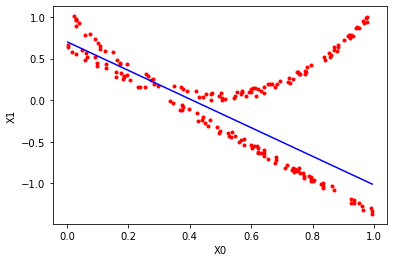

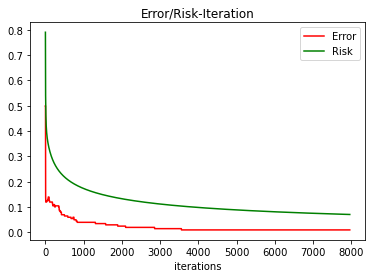

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat 
from numpy import exp, log, absolute
from numpy.linalg import norm

def sigmoid(X):
    return 1.0/ (1+exp(-X))

def cal_risk(y, y_pred, N):
    risk = 0
    for i in range(y.shape[0]):
        if y[i,0] == 1:
            risk -= log(y_pred[i,0])
        else:
            risk -= log(1-y_pred[i,0])
    return risk/N

def cal_error(y, y_pred, N):
    return float(np.count_nonzero((y_pred>0.5)!=y))/N

def LR(x, y, opts):
    samples_num, features_num = x.shape
    lr  = opts['lr']
    tol = opts['tol']
    weights = np.random.random_sample((features_num, 1))
    error_list = []
    risk_list  = []
    iters = 0

    while True:
        output  = sigmoid(x.dot(weights))
        error   = y - output
        error_list.append(cal_error(y, output, samples_num))
        risk_list.append(cal_risk(y, output, samples_num))
        dec     = lr * 1/samples_num * x.T.dot(error)
        weights = weights + dec
        iters  += 1
        if norm(dec)<tol:
            break
    
    return weights, iters, error_list, risk_list

def show_model(weights, x, y):
    plt.figure(0)
    samples_num = x.shape[0]
    for i in range(samples_num):
        plt.plot(x[i, 0], x[i, 1], 'r.')
    min_x = min(x[:, 0])
    max_x = max(x[:, 0])
    y_min_x = float(-weights[2] - weights[0] * min_x) / weights[1]
    y_max_x = float(-weights[2] - weights[0] * max_x) / weights[1]
    plt.plot([min_x, max_x], [y_min_x, y_max_x], '-b')
    plt.xlabel('X0'); plt.ylabel('X1')
    plt.show()

def show_err_trend(iters, error_list, risk_list):
    plt.figure(1)
    plt.plot(range(iters), error_list,'r-',label='Error')
    plt.plot(range(iters), risk_list, 'g-',label='Risk')
    plt.xlabel('iterations')
    plt.title('Error/Risk-Iteration')
    plt.legend()
    plt.show()

# if __name__=="__main__":
matdata = loadmat('dataset4.mat')
x = matdata['X']
y = matdata['Y']

opts = {'lr':0.9, 'tol':0.002} #(0.1, 0.005), (1, 0.005), (1, 0.001),(1, 0.003)
weights, iters, error_list, risk_list= LR(x, y, opts)
print(iters)
show_model(weights, x, y)
show_err_trend(iters, error_list, risk_list)